In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

In [48]:
import geonamescache

gc = geonamescache.GeonamesCache()
#all_cities = gc.get_cities()

def get_city_info_by_name_and_country(city_name, country):
    city_info = gc.get_cities_by_name(city_name)
    #print(city_info)
    for info in city_info:
        #print(info.keys())
        #key = info.keys()[0]
        for key in info.keys():
            if info[key].get('countrycode') == country:
                return info[key]
    return None

print(get_city_info_by_name_and_country('San Francisco', 'US'))

{'geonameid': 5391959, 'name': 'San Francisco', 'latitude': 37.77493, 'longitude': -122.41942, 'countrycode': 'US', 'population': 864816, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA', 'alternatenames': ['Franciscopolis', 'Frisco', 'Kapalakiko', 'Khiu-kim-san', 'Khiu-kîm-sân', 'Lungsod ng San Francisco', 'New Albion', 'SF', 'SFO', 'San Francisco', 'San Franciscu', 'San Francisko', 'San Fransisco', 'San Fransiskas', 'San Fransisko', 'San Frantzisko', 'San Phransisko', 'San-Francisko', 'San-Francyska', 'San-Fransisko', 'Sanfrancisko', 'Sao Francisco', 'São Francisco', 'Yerba Buena', 'can pirancisko', 'jiu jin shan', 'saenpeulan', 'saenpeulansiseuko', 'saina pharansisako', 'saina phransisko', 'san f ran si s ko', 'san fan shi', 'san fransskw', 'san fransyskw', 'san fransyskۆ', 'san phransisko', "sana phransisako ka'unti", 'sana phransisko', 'sanfuranshisuko', 'sena phransisko', 'sn prnsysqw', 'syana phransisko', 'Σαν Φρανσίσκο', 'Сан Франсиско', 'Сан Франциско', 'Сан-Франциско', '

In [49]:
def getPopulationOfCity(cityName, country):
    city_info = get_city_info_by_name_and_country(cityName, country)
    if city_info is not None:
        return city_info['population']
    else:
        return None

print(getPopulationOfCity('San Francisco', 'US'))

864816


In [50]:
import airportsdata

populationThreshold = 600000

# airports = airportsdata.load() 
# # for airport in airports:
# #     print(airport, airports[airport])
# # Access airport data by ICAO code
# #print(airports['KJFK']) 

# # Load data using IATA codes as keys
airports_iata = airportsdata.load('IATA')
# for iata in airports_iata:
#     print(iata, airports_iata[iata])
cities_dict = {}
us_airports = {iata: airport_info for iata, airport_info in airports_iata.items() if airports_iata[iata]['country'] == 'US'}
city_names = []
for iata in us_airports:
    #print(airport, airports_iata[airport]['country'])
    city_name = us_airports[iata]['city']
    if city_name not in city_names:
        city_names.append(city_name)
        country = us_airports[iata]['country']
        lat = us_airports[iata]['lat']
        lon = us_airports[iata]['lon']
        pop = getPopulationOfCity(city_name, country)
        if pop is not None:
            if pop > populationThreshold:
                cities_dict[city_name] = {'iata': iata, 'lat': lat, 'lon': lon}
                #print(city_name, iata,pop, country)
print(cities_dict)

{'Dallas': {'iata': 'ADS', 'lat': 32.96856, 'lon': -96.83644}, 'Washington': {'iata': 'WSG', 'lat': 40.13647, 'lon': -80.29019}, 'Fort Worth': {'iata': 'AFW', 'lat': 33.0, 'lon': -97.3}, 'Denver': {'iata': 'APA', 'lat': 39.57012, 'lon': -104.84929}, 'Austin': {'iata': 'AUM', 'lat': 43.66264, 'lon': -92.93292}, 'Seattle': {'iata': 'BFI', 'lat': 47.52997, 'lon': -122.30194}, 'Nashville': {'iata': 'BNA', 'lat': 36.12447, 'lon': -86.67818}, 'Boston': {'iata': 'BOS', 'lat': 42.36294, 'lon': -71.00639}, 'Charlotte': {'iata': 'CLT', 'lat': 35.21375, 'lon': -80.94906}, 'Houston': {'iata': 'CXO', 'lat': 30.3534, 'lon': -95.41508}, 'Detroit': {'iata': 'DET', 'lat': 42.40933, 'lon': -83.01017}, 'Phoenix': {'iata': 'DVT', 'lat': 33.68831, 'lon': -112.08256}, 'El Paso': {'iata': 'ELP', 'lat': 31.80733, 'lon': -106.37636}, 'Las Vegas': {'iata': 'HSH', 'lat': 36.0, 'lon': -115.1}, 'Indianapolis': {'iata': 'IND', 'lat': 39.71731, 'lon': -86.29464}, 'Los Angeles': {'iata': 'LAX', 'lat': 33.9425, 'lon':

In [51]:
codes_to_remove = ['BFI', 'RHV','BBX','AFW','LAX','MDW','MKE']
cities_dict = {city: cities_dict[city] for city in cities_dict if cities_dict[city]['iata'] not in codes_to_remove}

for city in cities_dict:
    print(city, cities_dict[city])

Dallas {'iata': 'ADS', 'lat': 32.96856, 'lon': -96.83644}
Washington {'iata': 'WSG', 'lat': 40.13647, 'lon': -80.29019}
Denver {'iata': 'APA', 'lat': 39.57012, 'lon': -104.84929}
Austin {'iata': 'AUM', 'lat': 43.66264, 'lon': -92.93292}
Nashville {'iata': 'BNA', 'lat': 36.12447, 'lon': -86.67818}
Boston {'iata': 'BOS', 'lat': 42.36294, 'lon': -71.00639}
Charlotte {'iata': 'CLT', 'lat': 35.21375, 'lon': -80.94906}
Houston {'iata': 'CXO', 'lat': 30.3534, 'lon': -95.41508}
Detroit {'iata': 'DET', 'lat': 42.40933, 'lon': -83.01017}
Phoenix {'iata': 'DVT', 'lat': 33.68831, 'lon': -112.08256}
El Paso {'iata': 'ELP', 'lat': 31.80733, 'lon': -106.37636}
Las Vegas {'iata': 'HSH', 'lat': 36.0, 'lon': -115.1}
Indianapolis {'iata': 'IND', 'lat': 39.71731, 'lon': -86.29464}
Memphis {'iata': 'MEM', 'lat': 35.04241, 'lon': -89.97668}
San Diego {'iata': 'MYF', 'lat': 32.8, 'lon': -117.1}
Oklahoma City {'iata': 'OKC', 'lat': 35.39307, 'lon': -97.60076}
San Antonio {'iata': 'SAT', 'lat': 29.53396, 'lon'

In [52]:
import pandas as pd

m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution='i')

def get_latlng_coordinates(city):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(city)
    if location is not None:
        return location.latitude, location.longitude
        # x, y = m(location.longitude, location.latitude)
        # return x,y
    else:
        return None
    
def get_xy_coordinates(lat, lng, map):
    x, y = m(lng, lat)
    return x,y
    
# Define the data for the DataFrame
data = {
    'City': list(cities_dict.keys()),
    'Airport Code': [],
    'Latitude': [],
    'Longitude': [],
    'X Coordinate': [],
    'Y Coordinate': []
}

# Populate the latitude, longitude, x coordinate, and y coordinate columns
for city in cities_dict:
    code = cities_dict[city]['iata']
    lat = cities_dict[city]['lat']
    lon = cities_dict[city]['lon']
    #lat, lng = get_latlng_coordinates(city)
    x,y = get_xy_coordinates(lat, lon, m)
    data['Airport Code'].append(code)
    if lat is not None:
        data['Latitude'].append(lat)
        data['Longitude'].append(lon)
        data['X Coordinate'].append(x)
        data['Y Coordinate'].append(y)
    else:
        data['Latitude'].append(None)
        data['Longitude'].append(None)
        data['X Coordinate'].append(None)
        data['Y Coordinate'].append(None)

# Create the DataFrame
df_cities = pd.DataFrame(data)

# Display the DataFrame
df_cities


,City,Airport Code,Latitude,Longitude,X Coordinate,Y Coordinate
0,Dallas,ADS,32.96856,-96.83644,3.131644e+06,1.136450e+06
1,Washington,WSG,40.13647,-80.29019,4.971502e+06,2.129998e+06
2,Denver,APA,39.57012,-104.84929,2.240656e+06,2.047965e+06
3,Austin,AUM,43.66264,-92.93292,3.565695e+06,2.656997e+06
4,Nashville,BNA,36.12447,-86.67818,4.261190e+06,1.562602e+06
5,Boston,BOS,42.36294,-71.00639,6.003813e+06,2.459338e+06
6,Charlotte,CLT,35.21375,-80.94906,4.898239e+06,1.437947e+06
7,Houston,CXO,30.35340,-95.41508,3.289691e+06,7.947587e+05
8,Detroit,DET,42.40933,-83.01017,4.669054e+06,2.466322e+06
9,Phoenix,DVT,33.68831,-112.08256,1.436353e+06,1.232237e+06


In [53]:
df_cities.to_csv('cities.csv', index=False)

In [54]:
df_cities = pd.read_csv('cities.csv')
df_cities


,City,Airport Code,Latitude,Longitude,X Coordinate,Y Coordinate
0,Dallas,ADS,32.96856,-96.83644,3.131644e+06,1.136450e+06
1,Washington,WSG,40.13647,-80.29019,4.971502e+06,2.129998e+06
2,Denver,APA,39.57012,-104.84929,2.240656e+06,2.047965e+06
3,Austin,AUM,43.66264,-92.93292,3.565695e+06,2.656997e+06
4,Nashville,BNA,36.12447,-86.67818,4.261190e+06,1.562602e+06
5,Boston,BOS,42.36294,-71.00639,6.003813e+06,2.459338e+06
6,Charlotte,CLT,35.21375,-80.94906,4.898239e+06,1.437947e+06
7,Houston,CXO,30.35340,-95.41508,3.289691e+06,7.947587e+05
8,Detroit,DET,42.40933,-83.01017,4.669054e+06,2.466322e+06
9,Phoenix,DVT,33.68831,-112.08256,1.436353e+06,1.232237e+06


In [55]:
from math import radians, sin, cos, sqrt, atan2

def get_xy_coordinates(city, df):
    row = df[df['City'] == city]
    x = row['X Coordinate'].values[0]
    y = row['Y Coordinate'].values[0]
    return x, y

def get_latlng_coordinates(city, df):
    row = df[df['City'] == city]
    lat = row['Latitude'].values[0]
    lng = row['Longitude'].values[0]
    return lat, lng

def compute_distance(city1, city2, df):
    lat1, lon1 = get_latlng_coordinates(city1, df)
    lat2, lon2 = get_latlng_coordinates(city2, df)
    
    # approximate radius of earth in miles
    R = 3958.8

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def get_airport_code(city, df):
    row = df[df['City'] == city]
    airport_code = row['Airport Code'].values[0]
    return airport_code


In [56]:
dist_min = 500
dist_max = 700

5711972.832976017 1967393.334832366 0.34443324440801426


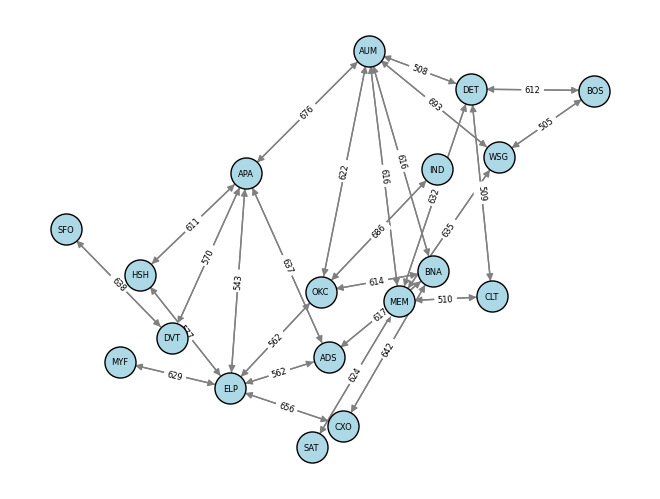

In [57]:
G = nx.DiGraph()

city_names = df_cities['City'].tolist()

for city in city_names:
    code = get_airport_code(city, df_cities)
    airport_code = get_airport_code(city, df_cities)
    #print(airport_code)
    x,y = get_xy_coordinates(city, df_cities)

    if x is not None:
        G.add_node(code, name = city, pos=(x,y))

max_x = max([x for x, y in nx.get_node_attributes(G, 'pos').values()])
min_x = min([x for x, y in nx.get_node_attributes(G, 'pos').values()])
max_y = max([y for x, y in nx.get_node_attributes(G, 'pos').values()])
min_y = min([y for x, y in nx.get_node_attributes(G, 'pos').values()])

x_diff = max_x - min_x
y_diff = max_y - min_y
ratio = y_diff / x_diff
print(x_diff, y_diff, ratio)
for u in G.nodes():
    x, y = G.nodes[u]['pos']
    x = (x - min_x) / (max_x - min_x)
    y = ratio*((y - min_y) / (max_y - min_y))
    G.nodes[u]['pos'] = (x, y)

# Add edges between nodes and assign weights proportional to the distance
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            x1, y1 = G.nodes[u]['pos']
            x2, y2 = G.nodes[v]['pos']
            #print(x1, y1, x2, y2)
            city1Name = G.nodes[u]['name']
            city2Name = G.nodes[v]['name']
            distance = compute_distance(city1Name, city2Name, df_cities)
            if distance < dist_max and distance > dist_min:
                G.add_edge(u, v, weight=distance)

# Draw the graph
labels = nx.get_edge_attributes(G, 'weight')

# Format the edge labels to two decimal places
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', font_size=6, edgecolors='black')
formatted_labels = {k: f"{int(v)}" for k, v in labels.items()}  # Format the edge labels to the nearest integer
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_size=6)
plt.show()
tikz_opts = "scale=11, ultra thick, node_style/.style={circle,draw=blue,fill=blue!20!,scale=0.6,font=\\tiny},edge_style/.style={draw=black, thick,font=\\tiny}"
edge_opts = {e: "edge_style" for e in G.edges}
edge_label_opts = {e: "below" for e in G.edges}
node_opts = {i: "node_style" for i in G.nodes}
latex_code = nx.to_latex(G,
                        tikz_options = tikz_opts,
                        node_options=node_opts, 
                        edge_options=edge_opts, 
                        edge_label=formatted_labels,
                        edge_label_options=edge_label_opts, 
                        as_document = False, caption="test", 
                        latex_label="fig:soln")
with open("tikz.tex", "w") as f:
    f.write(latex_code)

# Draw the graph
# pos = nx.get_node_attributes(G, 'pos')
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels)
# plt.show()

In [58]:
tikz_opts = "scale=11, ultra thick, node_style/.style={circle,draw=blue,fill=blue!20!,scale=0.6,font=\\tiny},edge_style/.style={draw=black, thick,font=\\tiny}"
edge_opts = {e: "edge_style" for e in G.edges}
edge_label_opts = {e: "below" for e in G.edges}
node_opts = {i: "node_style" for i in G.nodes}
latex_code = nx.to_latex(G,
                        tikz_options = tikz_opts,
                        node_options=node_opts, 
                        edge_options=edge_opts, 
                        edge_label=formatted_labels,
                        edge_label_options=edge_label_opts, 
                        as_document = False, caption="test", 
                        latex_label="fig:soln")
with open("tikz.tex", "w") as f:
    f.write(latex_code)